# Groundwater Flow Simulation using Finite Difference Method (Implicit Scheme)

This notebook simulates groundwater flow in a 2D confined aquifer using the implicit finite difference method. It visualizes the head distribution over time and includes animation.

## 1. Import Required Libraries

In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.animation as animation

## 2. Define Helper Function for closet node number

This function finds the closest node in the grid given a coordinate.

In [11]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)  # Compute squared distance
    return np.argmin(dist_2)  # Return index of closest node

## 3. Define Problem Parameters

In [37]:
# Domain size
Lx, Ly = 2000, 2000   # Length in x and y direction (meters)

# Grid resolution
delx, dely = 100, 100  # Grid spacing (meters)

# Aquifer properties
T = 500    # Transmissivity (m²/day)
S = 0.001  # Storage coefficient (dimensionless)
Q = 0.05   # Injection rate (m³/day)

# Time settings
t_total = 365  # Total simulation time (days)
delt = 1      # Time step (days) - must be small for numerical stability

## 4. Create Node Grid

Each node represents a point where we calculate the hydraulic head.

In [20]:
# Compute number of nodes
n_nodes_x = int(Lx / delx) + 1  # Nodes in x-direction
n_nodes_y = int(Ly / dely) + 1  # Nodes in y-direction
numnodes = n_nodes_x * n_nodes_y  # Total number of nodes

# Generate node coordinates
nodes = np.array([[i * delx, j * dely] for i in range(n_nodes_x) for j in range(n_nodes_y)])


## 5. Identify Boundary Nodes

We assume a constant head on the left and right boundaries.

In [26]:
# Identify boundary node indices
left = np.arange(0, n_nodes_x, 1)
right = np.arange(numnodes - n_nodes_y, numnodes, 1)
bottom = np.arange(n_nodes_y, numnodes - n_nodes_y - 1, n_nodes_y)
top = np.arange(2 * n_nodes_y - 1, numnodes - 1, n_nodes_y)
boundary = np.concatenate((left, right, top, bottom), axis=0)

## 6. Initialize Head Values

In [31]:
# Initialize hydraulic head (h) at all nodes
h_old = np.zeros(numnodes) + 100  # Initial condition (100m everywhere)

# Apply boundary conditions
h_old[left] = 100  # Fixed head on left boundary
h_old[right] = 100  # Fixed head on right boundary


## 7. Solve for Head Distribution Over Time

We use the implicit finite difference method and solve the linear system at each time step

In [39]:
# Store head values over time
head_history = []
time_history = []

# Start time loop
t = 0.0
while t <= t_total:
    print(f"Time Step: {t} days")
    
    # Define coefficient matrix A and right-hand side vector b
    A = np.zeros((numnodes, numnodes))
    b = np.zeros(numnodes)

    # Loop over all nodes
    for i in range(numnodes):
        x, y = nodes[i]  # Get node coordinates

        # Set diagonal term in matrix A
        A[i, i] = 4 * T * delt / (S * delx**2) + 1
        b[i] = h_old[i]

        # Interior nodes: Apply finite difference approximation
        if i not in boundary:
            north = closest_node([x, y + dely], nodes)
            south = closest_node([x, y - dely], nodes)
            east = closest_node([x + delx, y], nodes)
            west = closest_node([x - delx, y], nodes)

            # Set coefficients for finite difference method
            A[i, north] = A[i, south] = A[i, east] = A[i, west] = -T * delt / (delx**2 * S)

        # Special case for top boundary
        if i in top:
            south = closest_node([x, y - dely], nodes)
            east = closest_node([x + delx, y], nodes)
            west = closest_node([x - delx, y], nodes)
            A[i, south] = -2 * T * delt / (delx**2 * S)
            A[i, east] = A[i, west] = -T * delt / (delx**2 * S)

        # Special case for bottom boundary
        if i in bottom:
            north = closest_node([x, y + dely], nodes)
            east = closest_node([x + delx, y], nodes)
            west = closest_node([x - delx, y], nodes)
            A[i, north] = -2 * T * delt / (delx**2 * S)
            A[i, east] = A[i, west] = -T * delt / (delx**2 * S)

    # Apply injection well
    well_idx = closest_node([1000, 1000], nodes)
    b[well_idx] += Q * delt / S  

    # Apply boundary conditions
    b[left] = 100
    A[left, left] = 1
    b[right] = 100
    A[right, right] = 1

    # Solve system of equations
    h = linalg.solve(A, b)

    # Store results
    head_history.append(h.copy())
    time_history.append(t)

    # Update for next time step
    h_old = h.copy()
    t += delt

# Convert results to NumPy arrays
head_history = np.array(head_history)
time_history = np.array(time_history)


Time Step: 0.0 days
Time Step: 1.0 days
Time Step: 2.0 days
Time Step: 3.0 days
Time Step: 4.0 days
Time Step: 5.0 days
Time Step: 6.0 days
Time Step: 7.0 days
Time Step: 8.0 days
Time Step: 9.0 days
Time Step: 10.0 days
Time Step: 11.0 days
Time Step: 12.0 days
Time Step: 13.0 days
Time Step: 14.0 days
Time Step: 15.0 days
Time Step: 16.0 days
Time Step: 17.0 days
Time Step: 18.0 days
Time Step: 19.0 days
Time Step: 20.0 days
Time Step: 21.0 days
Time Step: 22.0 days
Time Step: 23.0 days
Time Step: 24.0 days
Time Step: 25.0 days
Time Step: 26.0 days
Time Step: 27.0 days
Time Step: 28.0 days
Time Step: 29.0 days
Time Step: 30.0 days
Time Step: 31.0 days
Time Step: 32.0 days
Time Step: 33.0 days
Time Step: 34.0 days
Time Step: 35.0 days
Time Step: 36.0 days
Time Step: 37.0 days
Time Step: 38.0 days
Time Step: 39.0 days
Time Step: 40.0 days
Time Step: 41.0 days
Time Step: 42.0 days
Time Step: 43.0 days
Time Step: 44.0 days
Time Step: 45.0 days
Time Step: 46.0 days
Time Step: 47.0 days
Ti

## 8. Plot Head Distribution at Final Time Step

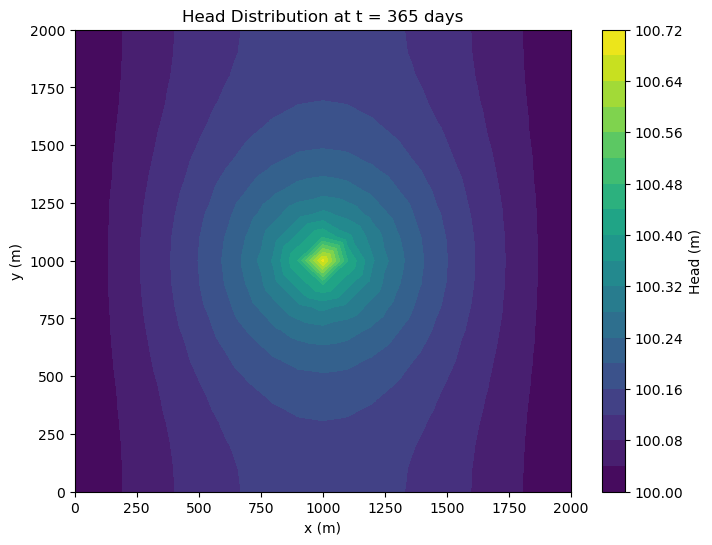

In [45]:
plt.figure(figsize=(8, 6))
plt.tricontourf(nodes[:, 0], nodes[:, 1], head_history[-1], 20, cmap='viridis')
plt.colorbar(label='Head (m)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(f'Head Distribution at t = {time_history[-1]:.0f} days')
plt.show()


## 9. Plot Head at a Specific Node Over Time

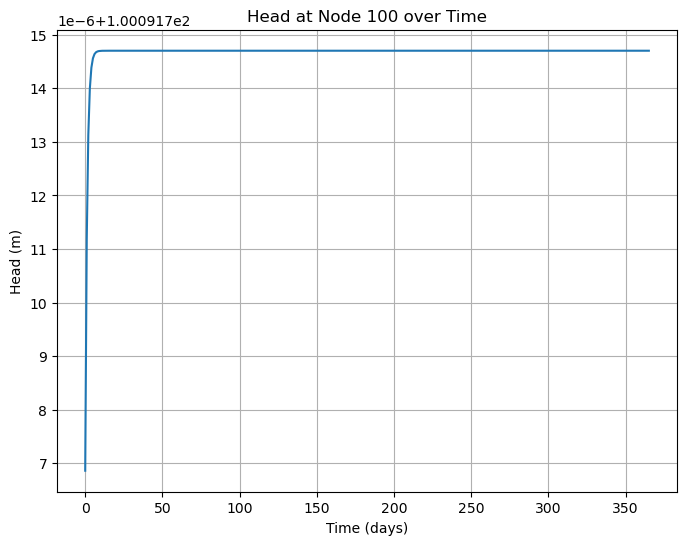

In [47]:
node_index = 100  # Choose a node
plt.figure(figsize=(8, 6))
plt.plot(time_history, head_history[:, node_index])
plt.xlabel('Time (days)')
plt.ylabel('Head (m)')
plt.title(f'Head at Node {node_index} over Time')
plt.grid(True)
plt.show()

## 10. Create 2D Animation of Head Distribution

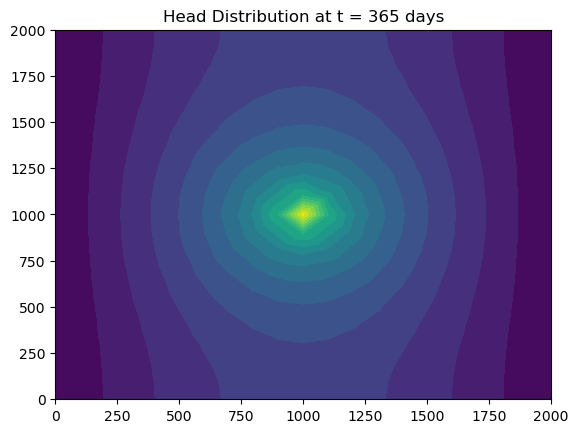

In [50]:
fig, ax = plt.subplots()
cont = ax.tricontourf(nodes[:, 0], nodes[:, 1], head_history[0], 20, cmap='viridis')

def animate(i):
    ax.clear()
    ax.tricontourf(nodes[:, 0], nodes[:, 1], head_history[i], 20, cmap='viridis')
    ax.set_title(f'Head Distribution at t = {time_history[i]:.0f} days')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(head_history), interval=100)
ani.save('head_animation.gif', writer='pillow', fps=10)
plt.show()

## 11. Create 3D Animation

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    ax.clear()
    ax.plot_trisurf(nodes[:, 0], nodes[:, 1], head_history[i], cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Head')

ani = animation.FuncAnimation(fig, animate, frames=len(head_history), interval=100)
ani.save('head_animation_3d.gif', writer='pillow', fps=10)
plt.show()